# <font color=blue>Dimensionality Reduction in Python</font> 
High-dimensional datasets can be overwhelming and leave you not knowing where to start. Typically, you’d visually explore a new dataset first, but when you have too many dimensions the classical approaches will seem insufficient. Fortunately, there are visualization techniques designed specifically for high dimensional data and you’ll be introduced to these in this course. After exploring the data, you’ll often find that many features hold little information because they don’t show any variance or because they are duplicates of other features. You’ll learn how to detect these features and drop them from the dataset so that you can focus on the informative ones. In a next step, you might want to build a model on these features, and it may turn out that some don’t have any effect on the thing you’re trying to predict. You’ll learn how to detect and drop these irrelevant features too, in order to reduce dimensionality and thus complexity. Finally, you’ll learn how feature extraction techniques can reduce dimensionality for you through the calculation of uncorrelated principal components.

## <font color=red>01 - Exploring high dimensional data </font> 
 You'll be introduced to the concept of dimensionality reduction and will learn when an why this is important. You'll learn the difference between feature selection and feature extraction and will apply both techniques for data exploration. The chapter ends with a lesson on t-SNE, a powerful feature extraction technique that will allow you to visualize a high-dimensional dataset. 

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Removing features without variance</h1><div class=""><p><p>A sample of the Pokemon dataset has been loaded as <code>pokemon_df</code>. To get an idea of which features have little variance you should use the IPython Shell to calculate summary statistics on the features of <code>pokemon_df</code>. Then adjust the code to create a smaller, easier to understand, dataset.</p></div></div>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pokemon_df = pd.read_csv('./data/pokemon.csv')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pokemon_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# Remove the feature without variance from this list
number_cols = ['HP', 'Attack', 'Defense']

# Leave this list as is for now
non_number_cols = ['Name', 'Type 1']

# Create a new dataframe by subselecting the chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new dataframe
print(df_selected.head())

   HP  Attack  Defense                   Name Type 1
0  45      49       49              Bulbasaur  Grass
1  60      62       63                Ivysaur  Grass
2  80      82       83               Venusaur  Grass
3  80     100      123  VenusaurMega Venusaur  Grass
4  39      52       43             Charmander   Fire


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Visually detecting redundant features</h1><div class=""><p><p>Data visualization is a crucial step in any data exploration.
Let's use Seaborn to explore some samples of the US Army ANSUR body measurement dataset.</p>
<p>Two data samples have been pre-loaded as <code>ansur_df_1</code> and  <code>ansur_df_2</code>.</p>
<p>Seaborn has been imported as <code>sns</code>.</p></div></div>

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
ansur_df_1 = pd.read_csv('./data/ANSUR_II_MALE.csv')
ansur_df_m = ansur_df_1[['Gender', 'weight_kg', 'stature_m' ]]
ansur_df_2 = pd.read_csv('./data/ANSUR_II_FEMALE.csv')
ansur_df_f = ansur_df_1[['Gender', 'weight_kg', 'stature_m' ]]

In [6]:
ansur_df_org = pd.concat((ansur_df_1, ansur_df_2), ignore_index=True)
ansur_df=ansur_df_org
df_1 = ansur_df [['Gender', 'weight_kg', 'stature_m' ]]

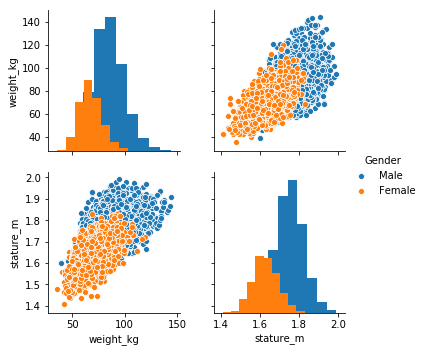

In [7]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(df_1, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

In [8]:
# Remove one of the redundant features
#ansur_df_1.____(____, ____, inplace=True)

# Create a pairplot and color the points using the 'Gender' feature
#sns.pairplot(ansur_df_1, hue='Gender')

# Show the plot
#plt.show()

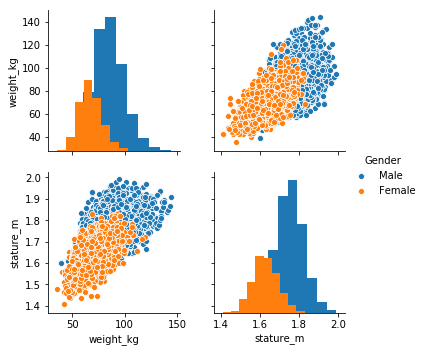

In [9]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(df_1, hue='Gender', diag_kind='hist')


# Show the plot
plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Fitting t-SNE to the ANSUR data</h1><div class=""><p><p>t-SNE is a great technique for visual exploration of high dimensional datasets. In this exercise, you'll apply it to the ANSUR dataset. You'll remove non-numeric columns from the pre-loaded dataset <code>df</code> and fit <code>TNSE</code> to his numeric dataset.</p></div></div>

In [10]:
from sklearn.manifold import TSNE

# Non-numerical columns in the dataset
non_numeric = ['Branch', 'Gender', 'Component', 'BMI_class','Height_class']

# Drop the non-numerical columns from df
df_numeric = ansur_df.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)

In [11]:
# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features[0:10])

[[  1.4745653 -17.490757 ]
 [ 22.423424  -12.012784 ]
 [-15.532645  -14.222113 ]
 [ 12.221481    9.833753 ]
 [ -4.053603  -56.611763 ]
 [ -5.58748    -3.00422  ]
 [-37.920094  -37.344963 ]
 [-19.01605   -48.39604  ]
 [-29.5962    -22.731524 ]
 [ 20.6141    -40.653313 ]]


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">t-SNE visualisation of dimensionality</h1><div class=""><p><p>Time to look at the results of your hard work. In this exercise, you will visualize the output of t-SNE dimensionality reduction on the combined male and female Ansur dataset.
You'll create 3 scatterplots of the 2 t-SNE features (<code>'x'</code> and <code>'y'</code>) which were added to the dataset <code>df</code>. In each scatterplot you'll color the points according to a different categorical variable.</p>
<p><code>seaborn</code> has already been imported as <code>sns</code> and <code>matplotlib.pyplot</code> as <code>plt</code>.</p></div></div>

In [12]:
df = ansur_df

In [13]:
df['x'] = tsne_features[:,0]
df['y'] = tsne_features[:,1]

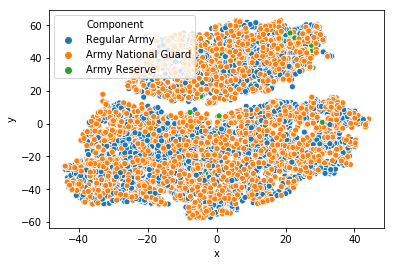

In [14]:
# Color the points according to Army Component
sns.scatterplot(x="x", y="y", hue='Component', data=df)

# Show the plot
plt.show()

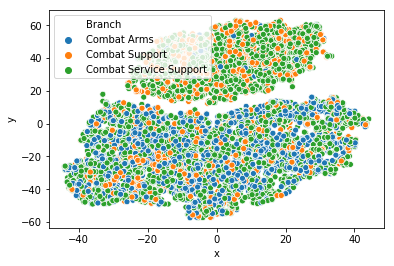

In [15]:
# Color the points by Army Branch
sns.scatterplot(x="x", y="y", hue='Branch', data=df)

# Show the plot
plt.show()

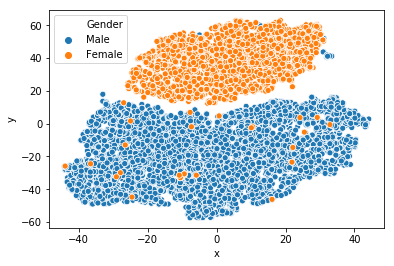

In [16]:
# Color the points by Gender
sns.scatterplot(x="x", y="y", hue='Gender', data=df)

# Show the plot
plt.show()

## <font color=red>02 - Feature selection I, selecting for feature information </font> 
 In this first out of two chapters on feature selection, you'll learn about the curse of dimensionality and how dimensionality reduction can help you overcome it. You'll be introduced to a number of techniques to detect and remove features that bring little added value to the dataset. Either because they have little variance, too many missing values, or because they are strongly correlated to other features. 

<div class="listview__content"><div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Train - test split</h1><div class=""><p><p>In this chapter, you will keep working with the ANSUR dataset. Before you can build a model on your dataset, you should first decide on which feature you want to predict. In this case, you're trying to predict gender.  </p>
<p>You need to extract the column holding this feature from the dataset and then split the data into a training and test set. The training set will be used to train the model and the test set will be used to check its performance on unseen data.</p>
<p><code>ansur_df</code> has been pre-loaded for you.</p></div></div></div>

In [17]:
drop_cols = ['Branch', 'Component', 'weight_kg', 'stature_m', 'BMI', 'BMI_class', 'Height_class']
ansur_df = df.drop(drop_cols, axis=1)

In [18]:
# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the Gender column as the feature to be predicted (y)
y = ansur_df['Gender']

# Remove the Gender column to create the training data
X = ansur_df.drop('Gender', axis=1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], 
                                                                        X_test.shape[1]))

1821 rows in test set vs. 4247 in training set. 93 Features.


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Fitting and testing the model</h1><div class=""><p><p>In the previous exercise, you split the dataset into <code>X_train</code>, <code>X_test</code>, <code>y_train</code>, and <code>y_test</code>. These datasets have been pre-loaded for you.
You'll now create a support vector machine classifier model (<code>SVC()</code>) and fit that to the training data.
You'll then calculate the accuracy on both the test and training set to detect overfitting.</p></div></div>

In [19]:
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

67.5% accuracy on test set vs. 100.0% on training set


Well done! Looks like the model badly overfits on the training data. On unseen data it performs worse than a random selector would.

<div class="listview__content"><div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Accuracy after dimensionality reduction</h1><div class=""><p><p>You'll reduce the overfit with the help of dimensionality reduction. In this case, you'll apply a rather drastic from of dimensionality reduction by only selecting a single column that has some good information to distinguish between genders. You'll repeat the train-test split, model fit and prediction steps to compare the accuracy on test vs. training data.</p>
<p>All relevant packages and <code>y</code> have been pre-loaded.</p></div></div></div>

In [20]:
y = ansur_df[['Gender']]

In [21]:
# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = ansur_df[['neckcircumferencebase']]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

C:\Python\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


92.4% accuracy on test set vs. 93.5% on training set


Wow, what just happened!? On the full dataset the model is rubbish but with a single feature we can make good predictions? This is an example of the curse of dimensionality! The model badly overfits when we feed it too many features. It overlooks that neck circumference by itself is pretty different for males and females.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Finding a good variance threshold</h1><div class=""><p><p>You'll be working on a slightly modified subsample of the ANSUR dataset with just head measurements pre-loaded as <code>head_df</code>.</p></div></div>

In [22]:
head_df = pd.read_csv('./data/head_df.txt', index_col=0)

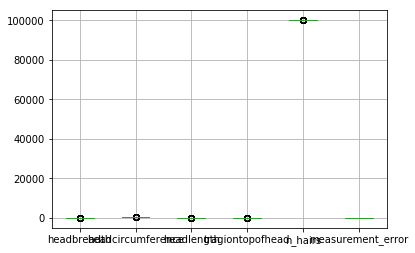

In [23]:
# Create the boxplot
head_df.boxplot()

plt.show()

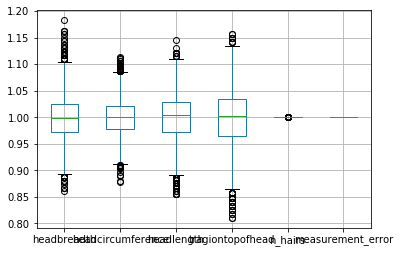

In [24]:
# Normalize the data
normalized_df = head_df / head_df.mean()

normalized_df.boxplot()
plt.show()

In [25]:
# Normalize the data
normalized_df = head_df / head_df.mean()

# Print the variances of the normalized data
print(normalized_df.var())

headbreadth          1.678952e-03
headcircumference    1.029623e-03
headlength           1.867872e-03
tragiontopofhead     2.639840e-03
n_hairs              1.002552e-08
measurement_error    3.231707e-27
dtype: float64


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Features with low variance</h1><div class=""><p><p>In the previous exercise you established that 0.001 is a good threshold to filter out low variance features in <code>head_df</code> after normalization. Now use the <code>VarianceThreshold</code> feature selector to remove these features.</p></div></div>

In [26]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.001)

# Fit the selector to normalized head_df
sel.fit(head_df / head_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = head_df.loc[:, mask]

print("Dimensionality reduced from {} to {}.".format(head_df.shape[1], reduced_df.shape[1]))

Dimensionality reduced from 6 to 4.


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Removing features with many missing values</h1><div class=""><p><p>You'll apply feature selection on the Boston Public Schools dataset which has been pre-loaded as <code>school_df</code>. Calculate the missing value ratio per feature and then create a mask to remove features with many missing values.</p></div></div>

In [27]:
import numpy as np

In [28]:
school_df = pd.read_csv('./data/Public_Schools2.csv')

In [29]:
# Create a boolean mask on whether each feature less than 50% missing values.
mask = school_df.isna().sum() / len(school_df) < 0.5

# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:,mask]

print(school_df.shape)
print(reduced_df.shape)

(131, 21)
(131, 19)


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Visualizing the correlation matrix</h1><div class=""><p><p>Reading the correlation matrix of <code>ansur_df</code> in its raw, numeric format doesn't allow us to get a quick overview.
Let's improve this by removing redundant values and visualizing the matrix using seaborn.</p>
<p>Seaborn has been pre-loaded as <code>sns</code>, matplotlib.pyplot as <code>plt</code>, NumPy as <code>np</code> and pandas as <code>pd</code>.</p></div></div>

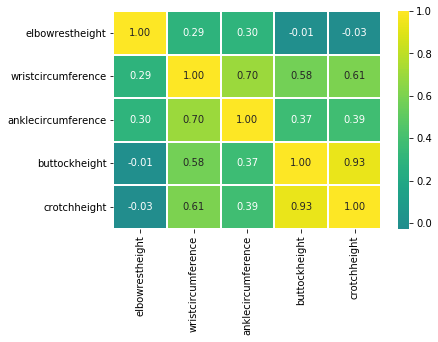

In [30]:
# Create the correlation matrix
corr = ansur_df[['elbowrestheight', 'wristcircumference', 'anklecircumference', 
                  'buttockheight', 'crotchheight']].corr()
# Draw the heatmap
sns.heatmap(corr,  cmap='viridis', center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

In [31]:
np.ones(corr.shape, dtype=bool)

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [32]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones(corr.shape, dtype=bool))

In [33]:
mask_1 = np.triu(np.ones(corr.shape, dtype=bool))

In [34]:
mask = np.triu(np.ones_like(corr, dtype=bool))

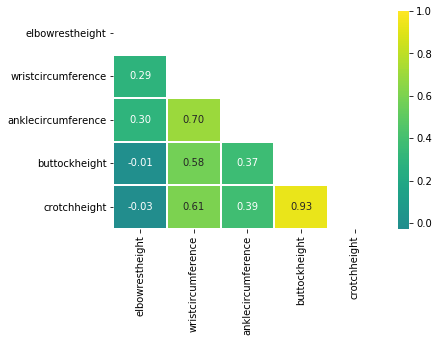

In [35]:
# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap='viridis', center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Filtering out highly correlated features</h1><div class=""><p><p>You're going to automate the removal of highly correlated features in the numeric ANSUR dataset. You'll calculate the correlation matrix and filter out columns that have a correlation coefficient of more than 0.95 or less than -0.95. </p>
<p>Since each correlation coefficient occurs twice in the matrix (correlation of A to B equals correlation of B to A) you'll want to ignore half of the correlation matrix so that only one of the two correlated features is removed. Use a mask trick for this purpose.</p></div></div>

In [36]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = ansur_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]

# Drop the features in the to_drop list
reduced_df = ansur_df.drop(to_drop, axis=1)

print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

The reduced dataframe has 76 columns.


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Nuclear energy and pool drownings</h1><div class=""><p><p>The dataset that has been pre-loaded for you as <code>weird_df</code> contains actual data provided by the US Centers for Disease Control &amp; Prevention and Deptartment of Energy.</p>
<p>Let's see if we can find a pattern.</p>
<p>Seaborn has been pre-loaded as <code>sns</code> and matplotlib.pyplot as <code>plt</code>.</p></div></div>

In [37]:
weird_df = pd.read_csv('./data/weird_df.txt', index_col=0)

In [38]:
weird_df

,pool_drownings,nuclear_energy
0,421,728.3
1,465,753.9
2,494,768.8
3,538,780.1
4,430,763.7
5,530,788.5
6,511,782.0
7,600,787.2
8,582,806.4
9,605,806.2


   pool_drownings  nuclear_energy
0             421           728.3
1             465           753.9
2             494           768.8
3             538           780.1
4             430           763.7


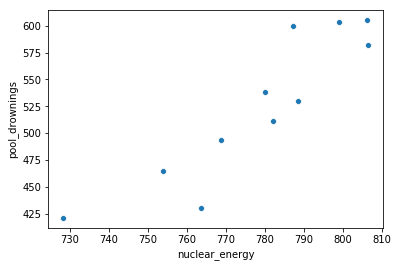

                pool_drownings  nuclear_energy
pool_drownings        1.000000        0.901179
nuclear_energy        0.901179        1.000000


In [39]:
# Print the first five lines of weird_df
print(weird_df.head())

# Put nuclear energy production on the x-axis and the number of pool drownings on the y-axis
sns.scatterplot(x='nuclear_energy', y='pool_drownings', data=weird_df)
plt.show()

# Print out the correlation matrix of weird_df
print(weird_df.corr())

## <font color=red>03 - Feature selection II, selecting for model accuracy </font> 
 In this second chapter on feature selection, you'll learn how to let models help you find the most important features in a dataset for predicting a particular target feature. In the final lesson of this chapter, you'll combine the advice of multiple, different, models to decide on which features are worth keeping. 

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Building a diabetes classifier</h1><div class=""><p><p>You'll using the Pima Indians diabetes dataset to predict whether a person has diabetes using logistic regression. There are 8 features and one target in this dataset pre-loaded for you as <code>X</code> and <code>y</code>.</p>
<p>We've also pre-loaded the <code>StandardScaler()</code>, <code>train_test_split()</code>, <code>LogisticRegression()</code>, and <code>accuracy_score()</code> functions from <code>sklearn</code> for you.</p></div></div>

In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [116]:
diabetes_df = pd.read_csv('./data/PimaIndians.csv')
X = diabetes_df.drop('test', axis = 1)
y = diabetes_df.test

In [117]:
# Scale the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state=0)

# Create the logistic regression model and fit it to the data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Calculate the accuracy on the test set
acc = accuracy_score(y_test, lr.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

79.6% accuracy on test set.
{'pregnant': 0.05, 'glucose': 1.21, 'diastolic': 0.03, 'triceps': 0.24, 'insulin': 0.19, 'bmi': 0.37, 'family': 0.34, 'age': 0.34}


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Manual Recursive Feature Elimination</h1><div class=""><p><p>Now that we've created a diabetes classifier, let's see if we can reduce the number of features without hurting the model accuracy too much.</p>
<p>On the second line of code the features are selected from the original dataframe. Adjust this selection.</p>
<p>A <code>StandardScaler()</code> instance has been predefined as <code>scaler</code> and a <code>LogisticRegression()</code> one as <code>lr</code>.</p>
<p>All necessary functions and packages have been pre-loaded too.</p></div></div>

In [118]:
# Remove the feature with the lowest model coefficient
X = diabetes_df[['pregnant', 'glucose', 'triceps', 'insulin', 'bmi', 'family', 'age']]

# Scales the features and performs a 25-75% train test split
X_std = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state=0)

# Creates the logistic regression model and fits it to the data
lr.fit(X_train, y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

80.6% accuracy on test set.
{'pregnant': 0.05, 'glucose': 1.21, 'triceps': 0.24, 'insulin': 0.19, 'bmi': 0.38, 'family': 0.33, 'age': 0.35}


In [119]:
# Remove the 2 features with the lowest model coefficients
X = diabetes_df[['glucose', 'triceps', 'bmi', 'family', 'age']]

# Scales the features and performs a 25-75% train test split
X_std = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state=0)

# Creates the logistic regression model and fits it to the data
lr.fit(X_train, y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

79.6% accuracy on test set.
{'glucose': 1.11, 'triceps': 0.25, 'bmi': 0.33, 'family': 0.33, 'age': 0.37}


In [120]:
# Only keep the feature with the highest coefficient
X = diabetes_df[['glucose']]

# Scales the features and performs a 25-75% train test split
X_std = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state=0)

# Creates the logistic regression model and fits it to the data
lr.fit(X_train, y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

76.5% accuracy on test set.
{'glucose': 1.25}


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Automatic Recursive Feature Elimination</h1><div class=""><p><p>Now let's automate this recursive process. Wrap a Recursive Feature Eliminator (RFE) around our logistic regression estimator and pass it the desired number of features.</p>
<p>All the necessary functions and packages have been pre-loaded.</p></div></div>

In [121]:
from sklearn.feature_selection import RFE

X = diabetes_df.drop('test', axis = 1)
y = diabetes_df.test

# Scale the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state=0)

In [122]:
# Create the RFE with a LogisticRegression estimator and 3 features to select
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1)

# Fits the eliminator to the data
rfe.fit(X_train, y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))

# Print the features that are not eliminated
print(X.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc)) 

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
{'pregnant': 5, 'glucose': 1, 'diastolic': 6, 'triceps': 3, 'insulin': 4, 'bmi': 1, 'family': 2, 'age': 1}
Index(['glucose', 'bmi', 'age'], dtype='object')
80.6% accuracy on test set.


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Building a random forest model</h1><div class=""><p><p>You'll again work on the Pima Indians dataset to predict whether an individual has diabetes. This time using a random forest classifier. You'll fit the model on the training data after performing the train-test split and consult the feature importance values.</p>
<p>The feature and target datasets have been pre-loaded for you as <code>X</code> and <code>y</code>. Same goes for the necessary packages and functions.</p></div></div>

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
# Perform a 75% training and 25% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fit the random forest model to the training data
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Calculate the accuracy
acc = accuracy_score(y_test, rf.predict(X_test))

# Print the importances per feature
print(dict(zip(X.columns, rf.feature_importances_.round(2))))

# Print accuracy
print("{0:.1%} accuracy on test set.".format(acc))

{'pregnant': 0.09, 'glucose': 0.21, 'diastolic': 0.08, 'triceps': 0.11, 'insulin': 0.13, 'bmi': 0.09, 'family': 0.12, 'age': 0.16}
77.6% accuracy on test set.


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Random forest for feature selection</h1><div class=""><p><P>Now lets use the fitted random model to select the most important features from our input dataset <code>X</code>.</p>
<p>The trained model from the previous exercise has been pre-loaded for you as <code>rf</code>.</p></div></div>

In [50]:
# Create a mask for features importances above the threshold
mask = rf.feature_importances_ > 0.15

# Prints out the mask
print(mask)

[False  True False False False False False  True]


In [51]:
# Apply the mask to the feature dataset X
reduced_X = X.loc[:,mask]

# prints out the selected column names
print(reduced_X.columns)

Index(['glucose', 'age'], dtype='object')


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Recursive Feature Elimination with random forests</h1><div class=""><p><p>You'll wrap a Recusive Feature Eliminator around a random forest model to remove features step by step. This method is more conservative compared to selecting features after applying a single importance threshold. Since dropping one feature can influence the relative importances of the others.</p>
<p>You'll need these pre-loaded datasets: <code>X</code>, <code>X_train</code>, <code>y_train</code>.</p>
<p>Functions and classes that have been pre-loaded for you are: <code>RandomForestClassifier()</code>, <code>RFE()</code>, <code>train_test_split()</code>.</p></div></div>

In [52]:
# Wrap the feature eliminator around the random forest model
rfe = RFE(estimator=RandomForestClassifier(random_state=0), n_features_to_select=2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.


RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
  n_features_to_select=2, step=1, verbose=1)

In [53]:
rfe.support_

array([False,  True, False, False,  True, False, False, False])

In [54]:
# Create a mask
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:,mask]
print(reduced_X.columns)

Index(['glucose', 'insulin'], dtype='object')


In [55]:
# Set the feature eliminator to remove 2 features on each step
rfe = RFE(estimator=RandomForestClassifier(random_state=0), n_features_to_select=2, step=2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

# Create a mask
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)

Fitting estimator with 8 features.
Fitting estimator with 6 features.
Fitting estimator with 4 features.
Index(['glucose', 'insulin'], dtype='object')


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Creating a LASSO regressor</h1><div class=""><p><p>You'll be working on the numeric ANSUR body measurements dataset to predict a persons Body Mass Index (BMI) using the LASSO regressor. BMI is a metric derived from body height and weight but those two features have been removed from the dataset to give the model a challenge.</p>
<p>You'll standardise the data first using the <code>StandardScaler()</code> to make sure all coefficients face a comparable regularizing force that tries to bring them down. After performing the train-test split you'll create the <code>Lasso</code> regressor and fit it to the training set.</p>
<p>All necessary functions and classes plus the input datasets <code>X</code> and <code>y</code> have been pre-loaded.</p></div></div>

In [125]:
ansur_df_org.head()
drop_cols = ['Branch', 'Component', 'Gender', 'weight_kg', 'stature_m', 'BMI', 'BMI_class', 'Height_class']
X = ansur_df_org.drop(drop_cols, axis=1)
y = ansur_df_org.BMI

In [126]:
from sklearn.linear_model import Lasso

In [127]:
scaler = StandardScaler()

# Fit the scaler to X and transform the input features
X_std = scaler.fit_transform(X)

# Set the test size to 30% to get a 70-30% train test split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

# Create the Lasso model and fit it to the training data
la = Lasso()
la.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Lasso model results</h1><div class=""><p><p>Now that you've trained the Lasso model, you'll score its predictive capacity (R_squared) on the test set and count how many features are ignored because their coefficient is reduced to zero.</p>
<p>The fitted Lasso model <code>la</code> and the <code>X_test</code> and <code>y_test</code> datasets have been pre-loaded for you.</p></div></div>

In [128]:
# Calculate the coefficient of determination (R squared) on the test set
r_squared = la.score(X_test, y_test)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Sum the number of features for which the coefficients equal 0
n_ignored = sum(la.coef_  == 0)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

The model can predict 83.0% of the variance in the test set.
The model has ignored 83 out of 93 features.


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Adjusting the regularization strength</h1><div class=""><p><p>Your current Lasso model has an R_squared score of 84.7%. When a model applies overly powerful regularization it can suffer from high bias, hurting its predictive power.</p>
<p>Let's see if we can improve the predictive power by tweaking the regularization strength with the <code>alpha</code> parameter.</p></div></div>

In [129]:
# Find the right alpha value
la = Lasso(alpha=0.001, random_state=0)

# Fits the model and calculates performance stats
la.fit(X_train, y_train)
r_squared = la.score(X_test, y_test)
n_ignored_features = sum(la.coef_==0)

# Print peformance stats 
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))
print("{} out of {} features were ignored.".format(n_ignored_features, len(la.coef_)))

The model can predict 98.8% of the variance in the test set.
12 out of 93 features were ignored.


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Creating a LassoCV regressor</h1><div class=""><p><p>You'll be predicting biceps circumference on a subsample of the male ANSUR dataset using the <code>LassoCV()</code> regressor that automatically tunes the regularization strength (alpha value) using Cross-Validation.</p>
<p>The standardized training and test data has been pre-loaded for you as <code>X_train</code>, <code>X_test</code>, <code>y_train</code>, and <code>y_test</code>.</p></div></div>

In [130]:
from sklearn.linear_model import LassoCV

# Create and fit the LassoCV model on the training set
lcv = LassoCV()
lcv.fit(X_train, y_train)
print('Optimal alpha = {0:.3f}'.format(lcv.alpha_))

# Calculate R squared on the test set
r_squared = lcv.score(X_test, y_test)
print('The model explains {0:.1%} of the test set variance'.format(r_squared))

# Create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_ != 0
print('{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))

Optimal alpha = 0.004
The model explains 98.8% of the test set variance
64 features out of 93 selected


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Ensemble models for extra votes</h1><div class=""><p><p>The <code>LassoCV()</code> model selected 63 out of 91 features. Not bad, but not a spectacular dimensionality reduction either. Let's use two more models to select the 10 features they consider most important using the Recursive Feature Eliminator (RFE).</p>
<p>The standardized training and test data has been pre-loaded for you as <code>X_train</code>, <code>X_test</code>, <code>y_train</code>, and <code>y_test</code>.</p></div></div>

In [62]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=10, step=8, verbose=1)
rfe_gb.fit(X_train, y_train)

Fitting estimator with 93 features.
Fitting estimator with 85 features.
Fitting estimator with 77 features.
Fitting estimator with 69 features.
Fitting estimator with 61 features.
Fitting estimator with 53 features.
Fitting estimator with 45 features.
Fitting estimator with 37 features.
Fitting estimator with 29 features.
Fitting estimator with 21 features.
Fitting estimator with 13 features.


RFE(estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
  n_features_to_select=10, step=8, verbose=1)

In [63]:
# Calculate the R squared on the test set
r_squared = rfe_gb.score(X_test,y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

The model can explain 96.8% of the variance in the test set


In [64]:
# Assign the support array to gb_mask
gb_mask = rfe_gb.support_

In [65]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Select 10 features with RFE on a RandomForestRegressor, drop 3 features on each step
rfe_rf = RFE(estimator=RandomForestRegressor(), 
             n_features_to_select=10, step=8, verbose=1)
rfe_rf.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_rf.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
rf_mask = rfe_rf.support_

Fitting estimator with 93 features.
Fitting estimator with 85 features.
Fitting estimator with 77 features.
Fitting estimator with 69 features.
Fitting estimator with 61 features.
Fitting estimator with 53 features.
Fitting estimator with 45 features.
Fitting estimator with 37 features.
Fitting estimator with 29 features.
Fitting estimator with 21 features.
Fitting estimator with 13 features.
The model can explain 95.8% of the variance in the test set


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Combining 3 feature selectors</h1><div class=""><p><p>We'll combine the votes of the 3 models you built in the previous exercises, to decide which features are important into a meta mask. We'll then use this mask to reduce dimensionality and see how a simple linear regressor performs on the reduced dataset.</p>
<p>The per model votes have been pre-loaded as <code>lcv_mask</code>, <code>rf_mask</code>, and <code>gb_mask</code>. The feature and target datasets as <code>X</code> and <code>y</code> and numpy as <code>np</code>.
A <code>StandardScaler()</code> instance has been predefined as <code>scaler</code> and a <code>LinearRegression()</code> one as <code>lm</code>.</p></div></div>

In [66]:
# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

In [67]:
# Create a mask for features selected by all 3 models
meta_mask = votes >2

In [68]:
# Apply the dimensionality reduction on X
X_reduced = X.loc[:,meta_mask]
print(X_reduced.columns)

Index(['axillaheight', 'bicepscircumferenceflexed', 'calfcircumference',
       'chestcircumference', 'lowerthighcircumference', 'thighcircumference',
       'waistcircumference', 'x'],
      dtype='object')


In [69]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [70]:
import warnings
warnings.filterwarnings('ignore')

In [71]:
# Plug the reduced dataset into a linear regression pipeline
X_std = scaler.fit_transform(X_reduced)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)
lm.fit(X_train, y_train)
r_squared = lm.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set using {1:} features.'.format(r_squared, len(lm.coef_)))

The model can explain 97.1% of the variance in the test set using 8 features.


## <font color=red>04 - Feature extraction </font> 
 This chapter is a deep-dive on the most frequently used dimensionality reduction algorithm, Principal Component Analysis (PCA). You'll build intuition on how and why this algorithm is so powerful and will apply it both for data exploration and data pre-processing in a modeling pipeline. You'll end with a cool image compression use case. 

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Manual feature extraction I</h1><div class=""><p><p>You want to compare prices for specific products between stores. The features in the pre-loaded dataset <code>sales_df</code> are: <code>storeID</code>, <code>product</code>, <code>quantity</code> and <code>revenue</code>. The <code>quantity</code> and <code>revenue</code> features tell you how many items of a particular product were sold in a store and what the total revenue was. For the purpose of your analysis it's more interesting to know the average price per product.</p></div></div>

In [72]:
import pandas as pd

In [73]:
sales_df = pd.read_csv('./data/grocery_sales.csv')

In [74]:
sales_df.head()

,storeID,product,quantity,revenue
0,A,Apples,1811,9300.6
1,A,Bananas,1003,3375.2
2,A,Oranges,1604,8528.5
3,B,Apples,1785,9181.0
4,B,Bananas,944,3680.2


In [75]:
# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df['revenue']/sales_df['quantity']

# Drop the quantity and revenue features
sales_df.drop(['quantity', 'revenue'], axis=1, inplace=True)

print(sales_df.head())

  storeID  product     price
0       A   Apples  5.135616
1       A  Bananas  3.365105
2       A  Oranges  5.317020
3       B   Apples  5.143417
4       B  Bananas  3.898517


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Manual feature extraction II</h1><div class=""><p><p>You're working on a variant of the ANSUR dataset, <code>height_df</code>, where a person's height was measured 3 times. Add a feature with the mean height to the dataset and then drop the 3 original features.</p></div></div>

In [76]:
height_df = pd.read_csv('./data/height_df.txt', index_col=0)
height_df.head(1)

,weight_kg,height_1,height_2,height_3
0,81.5,1.78,1.8,1.8


In [77]:
height_df.mean()

weight_kg    83.8580
height_1      1.7538
height_2      1.7537
height_3      1.7550
dtype: float64

In [78]:
# Calculate the mean height
height_df['height'] = (height_df['height_1'] + height_df['height_2'] + height_df['height_3'])/3

# Drop the 3 original height features
height_df.drop(['height_1','height_2','height_3'], axis=1, inplace=True)

print(height_df.head())

   weight_kg    height
0       81.5  1.793333
1       72.6  1.696667
2       92.9  1.740000
3       79.4  1.670000
4       94.6  1.913333


<div class="dc-u-p-24"><h1 class="dc-h3">Principal component intuition</h1><div class=""><p><img src="https://assets.datacamp.com/production/repositories/3515/datasets/e27f8bb70e835e93ebd24a18f65d1399b142184f/lower_vs_upper_arm_vectors_small.png" alt="Forearm vs upper arm lengths"></p><p>
<p>After standardizing the lower and upper arm lengths from the ANSUR dataset we've added two perpendicular vectors that are aligned with the main directions of variance. We can describe each point in the dataset as a combination of these two vectors multiplied with a value each. These values are then called principal components.</p>
<hr>
<p>Which of the following statements is true?</p></div></div>

- People with a negative component for the yellow vector have long forearms relative to their upper arms. *
- People with a positive component for the yellow vector have long forearms relative to their upper arms.
- People with a negative component for the red vector have above average arm lengths.
press
- People with a positive component for the red vector have below average arm lengths.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Calculating Principal Components</h1><div class=""><p><p>You'll visually inspect a 4 feature sample of the ANSUR dataset before and after PCA using Seaborn's <code>pairplot()</code>. This will allow you to inspect the pairwise correlations between the features.</p>
<p>The data has been pre-loaded for you as <code>ansur_df</code>.</p></div></div>

In [79]:
ansur_df = ansur_df_org[['stature_m', 'buttockheight', 
              'waistcircumference', 'shouldercircumference']]

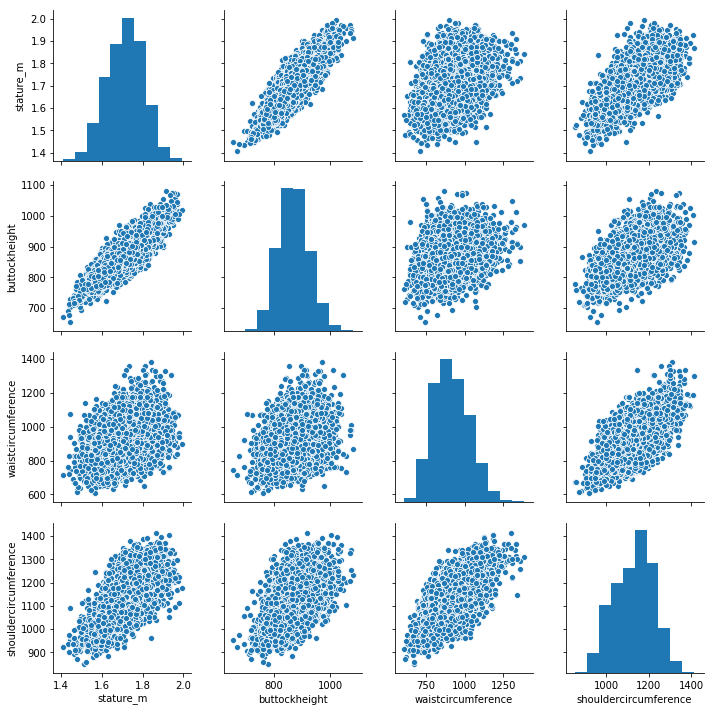

In [80]:
# Create a pairplot to inspect ansur_df
sns.pairplot(ansur_df)

plt.show()

In [81]:
from sklearn.preprocessing import StandardScaler

# Create the scaler and standardize the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

In [82]:
from sklearn.decomposition import PCA

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)

# This changes the numpy array output back to a dataframe
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

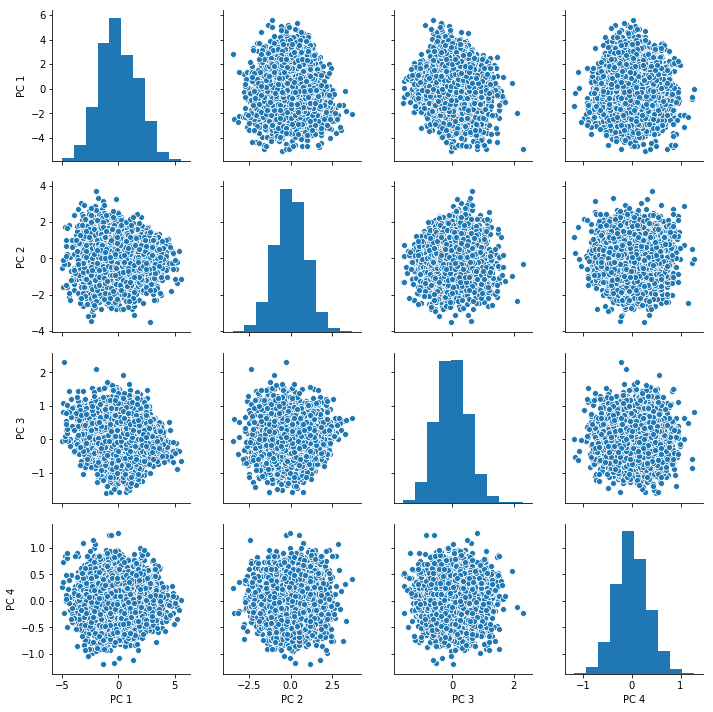

In [83]:
# Create a pairplot of the principal component dataframe
sns.pairplot(pc_df)
plt.show()

Notice how, in contrast to the input features, none of the principal components are correlated to one another.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">PCA on a larger dataset</h1><div class=""><p><p>You'll now apply PCA on a somewhat larger ANSUR datasample with 13 dimensions, once again pre-loaded as <code>ansur_df</code>. The fitted model will be used in the next exercise.
Since we are not using the principal components themselves there is no need to transform the data, instead, it is sufficient to fit <code>pca</code> to the data.</p></div></div>

In [84]:
ansur_df = ansur_df_org[['stature_m', 'buttockheight', 'waistdepth', 'span', 'waistcircumference', 'shouldercircumference', 'footlength', 'handlength', 'functionalleglength', 'chestheight', 'chestcircumference','cervicaleheight', 'sittingheight']]

In [85]:
# Scale the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Apply PCA
pca = PCA()
pca.fit(ansur_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">PCA explained variance</h1><div class=""><p><p>You'll be inspecting the variance explained by the different principal components of the <code>pca</code> instance you created in the previous exercise.</p></div></div>

In [86]:
# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)

[6.96695776e-01 1.65318195e-01 4.41759304e-02 3.10140882e-02
 1.96244729e-02 1.05810800e-02 1.00183486e-02 7.58854596e-03
 5.29894105e-03 4.64328943e-03 2.69987761e-03 1.87568473e-03
 4.65770148e-04]


In [87]:
# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

[0.69669578 0.86201397 0.9061899  0.93720399 0.95682846 0.96740954
 0.97742789 0.98501644 0.99031538 0.99495867 0.99765855 0.99953423
 1.        ]


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Understanding the components</h1><div class=""><p><p>You'll apply PCA to the numeric features of the Pokemon dataset, <code>poke_df</code>, using a pipeline to combine the feature scaling and PCA in one go. You'll then interpret the meanings of the first two components.</p>
<p>All relevant packages and classes have been pre-loaded for you (<code>Pipeline()</code>, <code>StandardScaler()</code>, <code>PCA()</code>).</p></div></div>

In [88]:
from sklearn.pipeline import Pipeline
poke_df = pokemon_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

In [89]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=2))])

In [90]:
# Fit it to the dataset and extract the component vectors
pipe.fit(poke_df)
vectors = pipe.steps[1][1].components_.round(2)

# Print feature effects
print('PC 1 effects = ' + str(dict(zip(poke_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(poke_df.columns, vectors[1]))))

PC 1 effects = {'HP': 0.39, 'Attack': 0.44, 'Defense': 0.36, 'Sp. Atk': 0.46, 'Sp. Def': 0.45, 'Speed': 0.34}
PC 2 effects = {'HP': 0.08, 'Attack': -0.01, 'Defense': 0.63, 'Sp. Atk': -0.31, 'Sp. Def': 0.24, 'Speed': -0.67}


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">PCA for feature exploration</h1><div class=""><p><p>You'll use the PCA pipeline you've built in the previous exercise to visually explore how some categorical features relate to the variance in <code>poke_df</code>.
These categorical features (<code>Type</code> &amp; <code>Legendary</code>) can be found in a separate dataframe <code>poke_cat_df</code>. </p>
<p>All relevant packages and classes have been pre-loaded for you (<code>Pipeline()</code>, <code>StandardScaler()</code>, <code>PCA()</code>)</p></div></div>

In [91]:
poke_cat_df = pokemon_df[['Type 1', 'Legendary']]
poke_cat_df.columns = ['Type', 'Legendary']

In [92]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

print(pc)

[[-1.5563747  -0.02148212]
 [-0.36286656 -0.05026854]
 [ 1.28015158 -0.06272022]
 ...
 [ 2.45821626 -0.51588158]
 [ 3.5303971  -0.95106516]
 [ 2.23378629  0.53762985]]


In [93]:
# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:,0]
poke_cat_df['PC 2'] = pc[:,1]

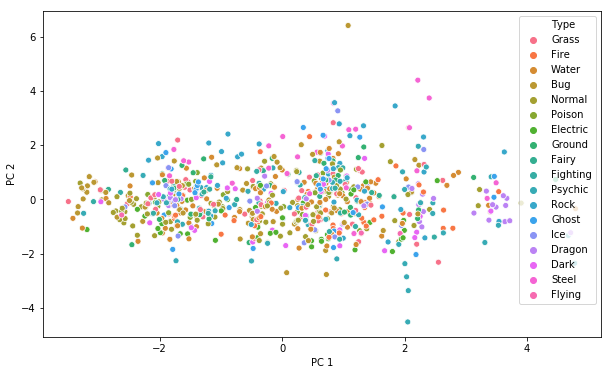

In [94]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Type')
plt.show()

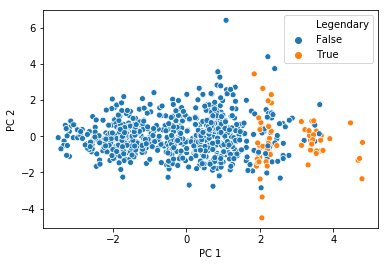

In [95]:
# Use the Legendary feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Legendary')
plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">PCA in a model pipeline</h1><div class=""><p><p>We just saw that legendary pokemon tend to have higher stats overall. Let's see if we can add a classifier to our pipeline that detects legendary versus non-legendary pokemon based on the principal components.</p>
<p>The data has been pre-loaded for you and split into training and tests datasets: <code>X_train</code>, <code>X_test</code>, <code>y_train</code>, <code>y_test</code>.</p>
<p>Same goes for all relevant packages and classes(<code>Pipeline()</code>, <code>StandardScaler()</code>, <code>PCA()</code>, <code>RandomForestClassifier()</code>).</p></div></div>

In [96]:
X = pokemon_df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
y = pokemon_df.Legendary

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [97]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=2)),
        ('classifier', RandomForestClassifier())])

In [98]:
# Fit the pipeline to the training data
pipe.fit(X_train,y_train)

# Prints the explained variance ratio
print(pipe.steps[1][1].explained_variance_ratio_)

[0.44658741 0.17715521]


In [99]:
# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the model accuracy
print('{0:.1%} test set accuracy'.format(accuracy))

95.8% test set accuracy


In [100]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe.steps[1][1].explained_variance_ratio_)
print('{0:.1%} test set accuracy'.format(accuracy))

[0.44658741 0.17715521 0.13313638]
95.8% test set accuracy


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Selecting the proportion of variance to keep</h1><div class=""><p><p>You'll let PCA determine the number of components to calculate based on an explained variance threshold that you decide.</p>
<p>You'll work on the numeric ANSUR female dataset pre-loaded as <code>ansur_df</code>.</p>
<p>All relevant packages and classes have been pre-loaded too (<code>Pipeline()</code>, <code>StandardScaler()</code>, <code>PCA()</code>).</p></div></div>

In [101]:
ansur_df = ansur_df_org.drop(['Branch', 'Component', 'Gender', 'BMI_class', 'Height_class'], axis=1)

In [102]:
# Pipe a scaler to PCA selecting 80% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.8))])

In [103]:
# Fit the pipe to the data
pipe.fit(ansur_df)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))

6 components selected


In [104]:
# Let PCA select 90% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.9))])

# Fit the pipe to the data
pipe.fit(ansur_df)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))

17 components selected


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Choosing the number of components</h1><div class=""><p><p>You'll now make a more informed decision on the number of principal components to reduce your data to using the "elbow in the plot" technique. One last time, you'll work on the numeric ANSUR female dataset pre-loaded as <code>ansur_df</code>.</p>
<p>All relevant packages and classes have been pre-loaded for you (<code>Pipeline()</code>, <code>StandardScaler()</code>, <code>PCA()</code>).</p></div></div>

In [105]:
# Pipeline a scaler and PCA selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=10))])

In [106]:
# Fit the pipe to the data
pipe.fit(ansur_df)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('reducer', PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

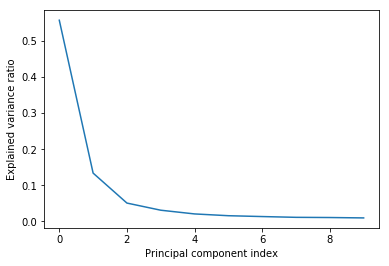

In [107]:
# Plot the explained variance ratio
plt.plot(pipe.steps[1][1].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">PCA for image compression</h1><div class=""><p><p>You'll reduce the size of 16 images with hand written digits (MNIST dataset) using PCA.</p>
<p>The samples are 28 by 28 pixel gray scale images that have been flattened to arrays with 784 elements each (28 x 28 = 784) and added to the 2D numpy array <code>X_test</code>. Each of the 784 pixels has a value between 0 and 255 and can be regarded as a feature. </p>
<p>A pipeline with a scaler and PCA model to select 78 components has been pre-loaded for you as <code>pipe</code>. This pipeline has already been fitted to the entire MNIST dataset except for the 16 samples in <code>X_test</code>.</p>
<p>Finally, a function <code>plot_digits</code> has been created for you that will plot 16 images in a grid.</p></div></div>

In [108]:
from sklearn.datasets import load_digits
MNIST = load_digits()
X = MNIST.data[0:80]
y = MNIST.target[0:80]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [109]:
def plot_digits(X):
    for index, image in enumerate(X):
        plt.subplot(4, 4, index + 1)
        plt.axis('off')
        image = image.reshape(8,8)
        plt.imshow(image, cmap=plt.cm.gray_r,interpolation='nearest')
        #print(index)
        #print(image)
    return None

In [110]:
# Pipeline a scaler and PCA selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=10))])

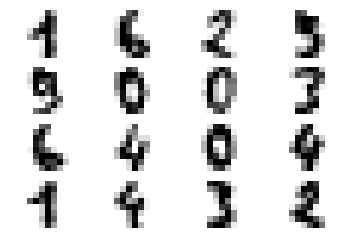

In [111]:
# Plot the MNIST sample data
plot_digits(X_test)

In [112]:
# Transform the input data to principal components
pc = pipe.fit_transform(X_test)

# Prints the number of features per dataset
print("X_test has {} features".format(X_test.shape[1]))
print("pc has {} features".format(pc.shape[1]))

X_test has 64 features
pc has 10 features


In [113]:
# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Prints the number of features
print("X_rebuilt has {} features".format(X_rebuilt.shape[1]))

X_rebuilt has 64 features


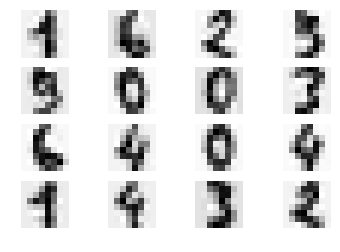

In [114]:
# Plot the reconstructed data
plot_digits(X_rebuilt)